In [438]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [439]:
import numpy as np
import pandas as pd

In [440]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [441]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [442]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Inspector = inspect(engine)



In [443]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [444]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [445]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [446]:
# Create our session (link) from Python to the DB
session = Session(engine)
#columns = Inspector.get_columns(Measurement)

# Exploratory Climate Analysis

In [447]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
conn = engine.connect()

engine.execute("UPDATE measurement SET prcp=0 WHERE prcp is null")


measurementDF = pd.read_sql("SELECT * from measurement\
                             where date like '2017%'\
                             or date like '2016-12%'\
                             or date like '2016-11%'\
                             or date like '2016-10%'\
                             or date like '2016-09%'\
                             or date = '2016-08-31'\
                             or date = '2016-08-30'\
                             or date = '2016-08-29'\
                             or date = '2016-08-28'\
                             or date = '2016-08-27'\
                             or date = '2016-08-26'\
                             or date = '2016-08-25'\
                             or date = '2016-08-24'"\
                            , conn)



measurementDF = measurementDF.set_index('date')
measurementDF = measurementDF.rename(columns={'prcp':'Precipitation'})

# Sort the dataframe by date
measurementDF.sort_values(by=['date'])
measurementDF.head()

#pd.date range

,id,station,Precipitation,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-26,2367,USC00519397,0.00,79.0
2016-08-27,2368,USC00519397,0.00,77.0
2016-08-28,2369,USC00519397,0.01,78.0


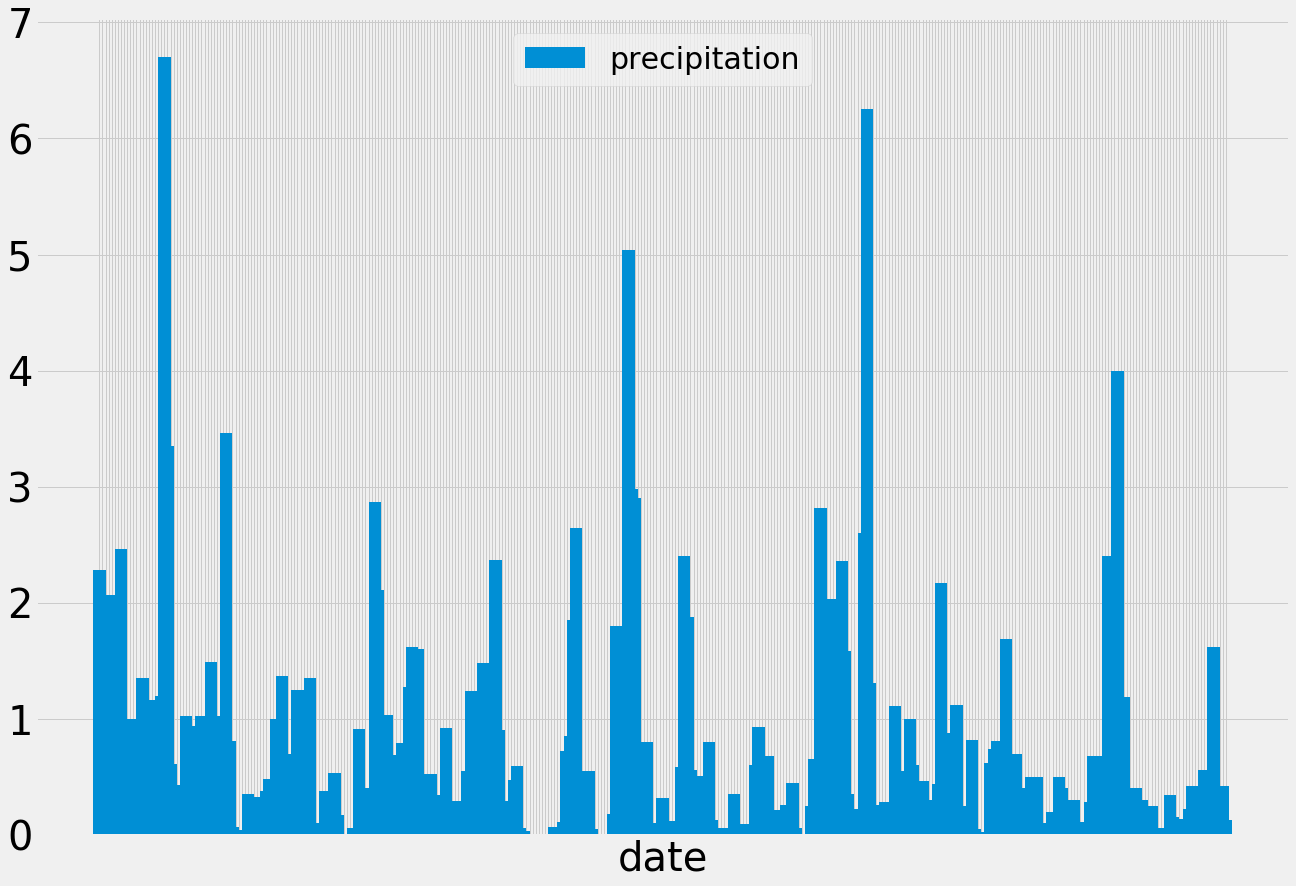

In [448]:
# Use Pandas Plotting with Matplotlib to plot the data
measurementDF = measurementDF.reset_index()
plt.figure(figsize=(20,14))                        
plt.bar(measurementDF['date'], measurementDF['Precipitation'], align='center', width=4)
plt.legend(["precipitation"], loc=9, prop={'size':30})
#plt.tight_layout(pad=7)
plt.xlabel("date", fontsize=40)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=40)
plt.grid(True, which='major')
plt.savefig("preciptation.png")
plt.show()

In [449]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurementDF = measurementDF.set_index('date')
measurementDF["Precipitation"].describe()

count    2223.000000
mean        0.159951
std         0.441220
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: Precipitation, dtype: float64

In [450]:
station_columns = Inspector.get_columns('Station')
for c in station_columns:
   print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [451]:
# Design a query to show how many stations are available in this dataset?
station_count = engine.execute("SELECT count(station) from Station")
for record in station_count:
    print(record)

# 2nd method
stationDF = pd.read_sql("SELECT * from Station", conn)
stationDF["station"].count()

(9,)


9

In [452]:
# What are the most active stations? (i.e. what stations have the most rows)?
stations_count = pd.read_sql("SELECT station, count(*) as counts from Measurement\
                             Group by station\
                             Order by counts DESC", conn)
stations_count



,station,counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [453]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
stations_temp = pd.read_sql("SELECT min(tobs), max(tobs), avg(tobs) from Measurement\
                            Where station='USC00519281'", conn)
stations_temp

stations1 = pd.read_sql("SELECT tobs, date, station from Measurement Where date like '2017-03-09%'", conn)
stations1
# Group by tobs"\

,tobs,date,station
0,72.0,2017-03-09,USC00519397
1,67.0,2017-03-09,USC00513117
2,69.0,2017-03-09,USC00514830
3,68.0,2017-03-09,USC00517948
4,70.0,2017-03-09,USC00519523
5,67.0,2017-03-09,USC00519281
6,72.0,2017-03-09,USC00516128


In [324]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stations_temp1 = pd.read_sql("SELECT tobs from Measurement Where (date like '2017%' or date like '2016-12%' or date like '2016-11%'\
 or date like '2016-10%'\
 or date like '2016-09%'\
 or date = '2016-08-31'\
 or date = '2016-08-30'\
 or date = '2016-08-29'\
 or date = '2016-08-28'\
 or date = '2016-08-27'\
 or date = '2016-08-26'\
 or date = '2016-08-25'\
 or date = '2016-08-24') and station = 'USC00519281'", conn)
# Group by tobs"\

stations_temp1

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
5,78.0
6,77.0
7,78.0
8,80.0
9,80.0


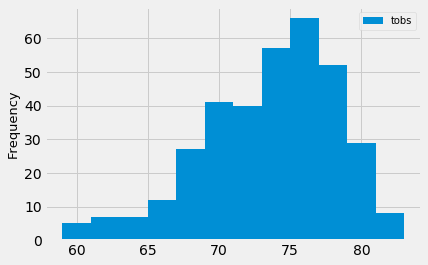

In [454]:
x= stations_temp1['tobs']
plt.hist(x, bins=12)
plt.ylabel('Frequency', fontsize=13)
plt.legend(["tobs"], loc=1, prop={'size':10})
plt.savefig("temperature_count.png")
plt.show()

# plt.figure(figsize=(10,7))                        
# plt.bar(Bins['Bin'], Bins['Total Count'], align='center', width=.25)
# plt.legend(["tobs"], loc=1, prop={'size':15})
# #plt.tight_layout(pad=7)
# plt.ylabel("frequency", fontsize=15)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
# plt.tick_params(
#     axis='y',          # changes apply to the x-axis
#     which='major',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False,
#     labelsize=40)
# plt.grid(True, which='major')
# plt.savefig("temperature_count.png")
# plt.show()

![precipitation](Images/station-histogram.png)

In [455]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [456]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-03-04', '2017-03-17'))

[(62.0, 70.97647058823529, 82.0)]


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


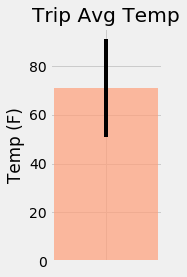

In [457]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df = pd.DataFrame(calc_temps('2017-03-04', '2017-03-17'), columns=['minimum', 'average', 'maximum'])
x = ('average')
plt.bar(x, df['average'], yerr=(df['maximum']-df['minimum']),align='center', width=30, alpha=.7, color='lightsalmon')
plt.grid(True, which='major')
plt.xlim(-16,16)
plt.ylabel('Temp (F)') 
plt.axes().set_aspect(.7)
plt.title("Trip Avg Temp")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig("temperature_average_min_max.png",bbox_inches='tight')
#plt.figure(figsize=(10,50)) 
plt.show()
#plt.tight_layout()

<IPython.core.display.Javascript object>


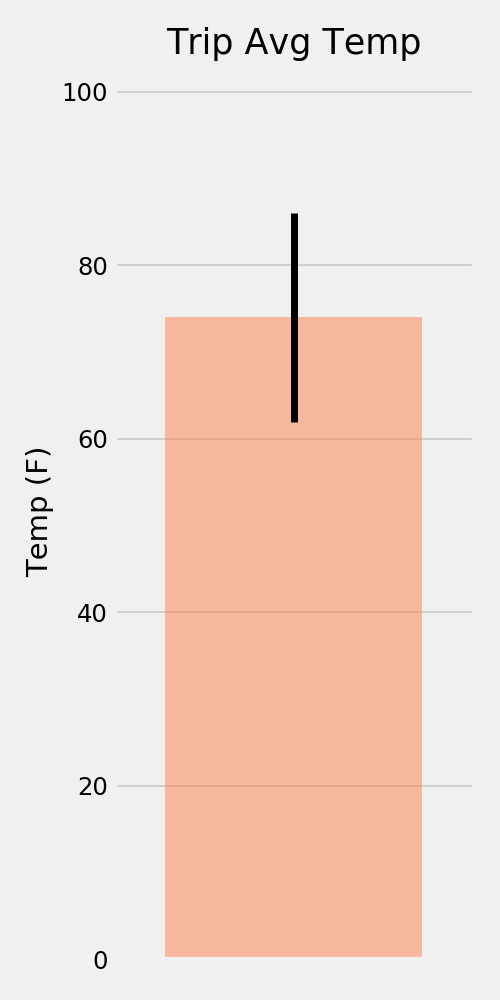

In [458]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()
columns = Inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [459]:
Inspector.get_table_names()

['measurement', 'station']

In [331]:
columns = Inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [460]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp]
date1 = dt.datetime(2017, 3, 4)
date2 = dt.datetime(2017, 3, 17)
same = session.query(*[Station.station, Station.name, Station.latitude,\
Station.longitude, Station.elevation, func.sum(Measurement.prcp)]).filter(Measurement.station == Station.station).\
filter(Measurement.date >= date1).filter(Measurement.date <= date2).\
group_by(Station.station).\
order_by(func.sum(Measurement.prcp).desc()).\
all()
                                                                                                             
same

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.76),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.31),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.69),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.36),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.35),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.35),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.06)]

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [461]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [462]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates

date_year = '2017'
date_month = "03"
date_day1 = '04'
date_day2 = "17"
dates = session.query(*[func.strftime("%m-%d",Measurement.date)]).\
filter(func.strftime("%Y", Measurement.date) == date_year).\
filter(func.strftime("%m", Measurement.date) == date_month).\
filter(func.strftime("%d", Measurement.date) >= date_day1).\
filter(func.strftime("%d", Measurement.date) <= date_day2).group_by(func.strftime("%m-%d", Measurement.date)).all()
normal=[]
ptps = list(np.ravel(dates))

for date in ptps:
    normal.extend(daily_normals(date))

# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
normal

[(57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0),
 (60.0, 69.20338983050847, 76.0),
 (60.0, 69.17241379310344, 78.0),
 (59.0, 68.72413793103448, 78.0),
 (57.0, 68.56140350877193, 75.0),
 (57.0, 69.12280701754386, 75.0),
 (60.0, 69.89285714285714, 82.0),
 (62.0, 69.88888888888889, 80.0),
 (56.0, 69.29629629629629, 77.0),
 (62.0, 70.32758620689656, 77.0),
 (58.0, 68.54716981132076, 76.0),
 (60.0, 69.70370370370371, 78.0),
 (57.0, 68.54, 75.0)]

In [463]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
tripdates_df = pd.DataFrame(normal, columns=['tmin', 'tavg', 'tmax'])
tripdates_df["date"] = ptps
tripdates_df.set_index('date')


,tmin,tavg,tmax
date,,,
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0
03-06,60.0,69.203390,76.0
03-07,60.0,69.172414,78.0
03-08,59.0,68.724138,78.0
03-09,57.0,68.561404,75.0
03-10,57.0,69.122807,75.0
03-11,60.0,69.892857,82.0
03-12,62.0,69.888889,80.0


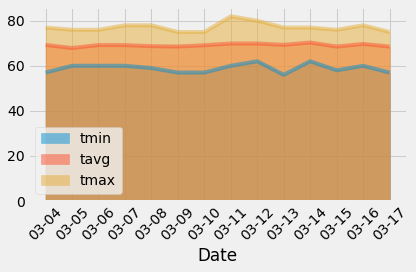

In [464]:
# Plot the daily normals as an area plot with `stacked=False`
tripdates_df.plot.area(stacked=False)
plt.xlabel('Date')
#plt.set_xticks(frame.dayofweek.values)
plt.xticks(tripdates_df.index, tripdates_df.date, rotation =45)
plt.tight_layout()
plt.show()

